In [24]:
from datasets.ESC50Dataset import ESC50Dataset
from torch.utils.data import Dataset,DataLoader
import librosa
from architecture.backend.yamnet.params import YAMNetParams

from transformations.transform import WaveformToInput
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from tqdm import tqdm

wave2input = WaveformToInput()

a = ESC50Dataset('/home/chenka@staff.technion.ac.il/Desktop/SVD')

dl = DataLoader(a,1)

h = torch.zeros(torch.Size((64,141)))
hc=0
s = torch.zeros(torch.Size((64,141)))
sc=0

for sample in tqdm(dl):    
    waveform = sample['data'][0]
    sr = sample['sampling_rate'][0]
    spectrogram = sample['data'][1].squeeze().T

    if (sample['classification']==0):
        h+=spectrogram
        hc+=1
    else:
        s+=spectrogram
        sc+=1
    # extent = (0, spectrogram.shape[0], -0.5, spectrogram.shape[1] - 0.5)
    # plt.imshow(spectrogram, aspect='auto', interpolation='nearest', origin='lower', extent=extent)
    # plt.xlim([0, len(waveform) / sr / YAMNetParams.STFT_HOP_SECONDS])
    # plt.show()


100%|██████████| 23234/23234 [01:09<00:00, 332.13it/s]


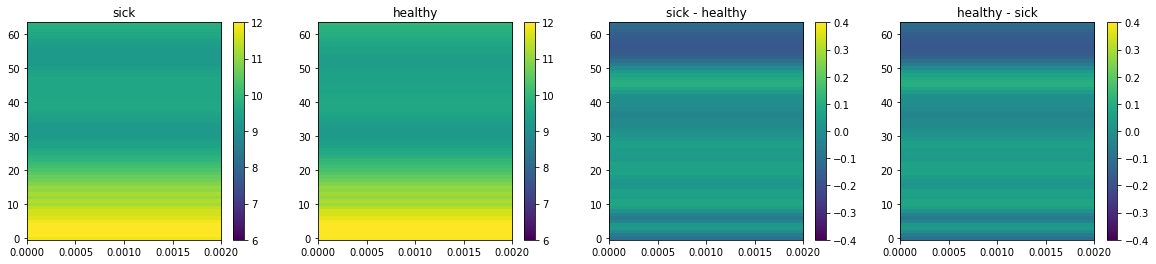

In [48]:
avg_h = h/hc
avg_s = s/sc
avg_diff = (avg_s - avg_h)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.imshow(avg_s, aspect='auto', origin='lower',vmin=6,vmax=12)
plt.xlim([0, len(waveform) / sr / YAMNetParams.STFT_HOP_SECONDS])
plt.title('sick')
plt.colorbar()

plt.subplot(1,4,2)
plt.imshow(avg_h, aspect='auto', origin='lower',vmin=6,vmax=12)
plt.xlim([0, len(waveform) / sr / YAMNetParams.STFT_HOP_SECONDS])
plt.title('healthy')
plt.colorbar()

plt.subplot(1,4,3)
plt.imshow(avg_diff, aspect='auto', origin='lower',vmin=-0.4,vmax=0.4)
plt.xlim([0, len(waveform) / sr / YAMNetParams.STFT_HOP_SECONDS])
plt.title('sick - healthy')
plt.colorbar()

plt.subplot(1,4,4)
plt.imshow(-avg_diff, aspect='auto', origin='lower',vmin=-0.4,vmax=0.4)
plt.xlim([0, len(waveform) / sr / YAMNetParams.STFT_HOP_SECONDS])
plt.title('healthy - sick')
plt.colorbar()
plt.show()
